# Avaliação - Data Toolbox
---

<img src="https://selecao.letscode.com.br/favicon.png" width="40px" style="position: absolute; top: 0px; right: 40px; border-radius: 5px;" />

### Instruções Iniciais

1. A nota máxima desta avaliação é 10, que corresponderá a 60% da nota total do módulo, sendo os outros 40% referentes ao case.  
2. Para uma melhor compreensão dos seus resultados durante o processo de correção, certifique-se de que você tenha deixado todos os comentários necessários para deixar clara a sua análise.  
3. Consulta ao material e notas de aula são permitidos.  
4. Podem ser usados materias suplementares que vocês encontraram na internet.  
5. Lembre-se que a avaliação é individual, portanto, não contate seus colegas. As dúvidas deverão ser enviadas aos professores. 
6. Alguns colegas farão o prova numa data posterior por questões de saúde. Por favor, não comentem em público sobre as questões até que todos a tenham realizado.
7. Todos os datasets que serão necessários durante a avaliação são disponibilizados por meio do link abaixo:

<a style="color: #0193F7; display: block; margin: 0 auto; text-align: center; background-color: #191a20; padding: 8px 10px; border-radius: 5px; width: 500px;" href="https://s3-sa-east-1.amazonaws.com/lcpi/0c29a119-af38-477f-b4d3-9fc97cfcae10.zip">Datasets necessários para a Avaliação</a>

---

In [1]:
# Importação das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly.express as px

## Questão 1

Considerando o conjunto de dados `natural-gas-prices-daily.csv`, carregue-o em um DataFrame e, em seguida:

a. (0,625) Visualize suas cinco primeiras linhas e imprima suas colunas. Em qual intervalo de datas temos os preços do gás natural?  
b. (0,625) Obtenha os preços mínimo e máximo do gás natural ao longo de todo o período de observação. Em quais datas o preço assumiu esses valores?  
c. (0,625) Crie um gráfico que te permita visualizar o preço do gás natural em cada dia, ao longo de todo o período de observação.  
d. (0,625) Crie uma nova coluna no DataFrame que contenha apenas o mês (como `int` ou a sigla como `str`) por meio da coluna `Date`.  
e. (0,625) Faça um gráfico que te permita visualizar o preço médio do gás natural ao longo dos 12 meses, considerando todo o período de observação (todos os meses).  
f. (0,625) Quais meses apresentam os preços mínimo e máximo do gás natural?

> **Valendo 3,75 pontos**

In [2]:
# a. (0,625) Visualize suas cinco primeiras linhas e imprima suas colunas. Em qual intervalo de datas temos os preços do gás natural?  

df_natural_gas = pd.read_csv('natural-gas-prices-daily.csv')
print(df_natural_gas.head())

data_minima = df_natural_gas['Date'].min()
data_maxima = df_natural_gas['Date'].max()
print(f'\nTemos os preços do gás natural para os dias entre {data_minima} e {data_maxima}')

         Date  Price
0  1997-01-07   3.82
1  1997-01-08   3.80
2  1997-01-09   3.61
3  1997-01-10   3.92
4  1997-01-13   4.00

Temos os preços do gás natural para os dias entre 1997-01-07 e 2020-09-01


In [3]:
#b. (0,625) Obtenha os preços mínimo e máximo do gás natural ao longo de todo o período de observação. Em quais datas o preço assumiu esses valores?  

preco_max = df_natural_gas['Price'].max()
preco_min = df_natural_gas['Price'].min()

index_preco_max = df_natural_gas['Price'].idxmax()
index_preco_min = df_natural_gas['Price'].idxmin()

data_preco_max = df_natural_gas['Date'][index_preco_max]
data_preco_min = df_natural_gas['Date'][index_preco_min]

print(f'O preço máximo do gás natural ao longo de todo o período de observação foi de {preco_max} e ele ocorreu na data {data_preco_max}')

print(f'\nO preço mínimo do gás natural ao longo de todo o período de observação foi de {preco_min} e ele ocorreu na data {data_preco_min}')

O preço máximo do gás natural ao longo de todo o período de observação foi de 18.48 e ele ocorreu na data 2003-02-25

O preço mínimo do gás natural ao longo de todo o período de observação foi de 1.05 e ele ocorreu na data 1998-12-04


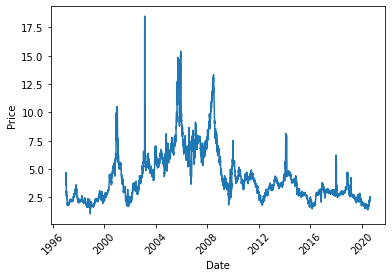

In [4]:
# c. (0,625) Crie um gráfico que te permita visualizar o preço do gás natural em cada dia, ao longo de todo o período de observação. 

def converter_para_datetime (string_horario):
    data_em_datetime = datetime.strptime(string_horario, '%Y-%m-%d')

    return data_em_datetime

df_natural_gas['Date'] = df_natural_gas['Date'].apply(converter_para_datetime) #Aplicando a função a todos os elementos da coluna "Date"

grafico = sns.lineplot(x = df_natural_gas['Date'], y = df_natural_gas['Price'])
grafico.tick_params(axis='x', rotation=45) 

In [5]:
# d. (0,625) Crie uma nova coluna no DataFrame que contenha apenas o mês (como `int` ou a sigla como `str`) por meio da coluna `Date`.
def pegar_mes (datetime):
    return int(datetime.month)

df_natural_gas['Month'] = df_natural_gas['Date'].apply(pegar_mes)

df_natural_gas

,Date,Price,Month
0,1997-01-07,3.82,1
1,1997-01-08,3.80,1
2,1997-01-09,3.61,1
3,1997-01-10,3.92,1
4,1997-01-13,4.00,1
...,...,...,...
5948,2020-08-26,2.52,8
5949,2020-08-27,2.52,8
5950,2020-08-28,2.46,8
5951,2020-08-31,2.30,8


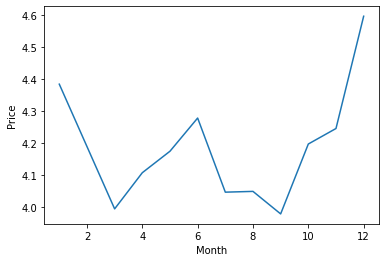

In [6]:
# e. (0,625) Faça um gráfico que te permita visualizar o preço médio do gás natural ao longo dos 12 meses, considerando todo o período de observação (todos os meses).
df_natural_gas_agrupado_por_mes = df_natural_gas.groupby('Month', as_index = False)['Price'].mean()

grafico2 = sns.lineplot(x = df_natural_gas_agrupado_por_mes['Month'], y = df_natural_gas_agrupado_por_mes['Price'])


In [7]:
# f. (0,625) Quais meses apresentam os preços mínimo e máximo do gás natural?

index_preco_max = df_natural_gas_agrupado_por_mes['Price'].idxmax()
index_preco_min = df_natural_gas_agrupado_por_mes['Price'].idxmin()

mes_preco_max = df_natural_gas_agrupado_por_mes['Month'][index_preco_max]
mes_preco_min = df_natural_gas_agrupado_por_mes['Month'][index_preco_min]

print(f'O mês que apresentou o preço máximo foi o mês {mes_preco_max}')

print(f'O mês que apresentou o preço máximo foi o mês {mes_preco_min}')


O mês que apresentou o preço máximo foi o mês 12
O mês que apresentou o preço máximo foi o mês 9


## Questão 2

Com a tabela de vendas de jogos de vídeo-games (`videogames.csv`), indique:

a. (0,625) Quais jogos estão no Top 10 de Vendas Globais, considerando apenas aqueles pertencentes às plataformas PS3, Wii, X360 e PC.  
b. (0,625) A proporção (percentual) de jogos criados por gênero: tabela e gráfico de pizza.  
c. (0,625) Um gráfico de linha com a quantidade de vendas, em média, por ano, separadas pelas plataformas PS3, Wii, X360 e PSP.  

> **Valendo 1,875 ponto**

In [8]:
df_videogame = pd.read_csv('videogame.csv')
df_videogame.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [9]:
# a. (0,625) Quais jogos estão no Top 10 de Vendas Globais, considerando apenas aqueles pertencentes às plataformas PS3, Wii, X360 e PC.

df_videogame_filtrado_plataformas = df_videogame[(df_videogame['Platform'] == 'PS3') | (df_videogame['Platform'] == 'Wii') | (df_videogame['Platform'] == 'X360') | (df_videogame['Platform'] == 'PC')]
df_videogame_filtrado_plataformas = df_videogame_filtrado_plataformas.sort_values('Global_Sales', ascending = False)
df_videogame_filtrado_plataformas.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
13,14,Wii Fit,Wii,2007.0,Sports,Nintendo,8.94,8.03,3.60,2.15,22.72
14,15,Wii Fit Plus,Wii,2009.0,Sports,Nintendo,9.09,8.59,2.53,1.79,22.00
15,16,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82
16,17,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
23,24,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38


In [10]:
# b. (0,625) A proporção (percentual) de jogos criados por gênero: tabela e gráfico de pizza. 

df_videogame_agrupado_genero = df_videogame.groupby('Genre')[['Name']].nunique() #Contando a quantidade de jogos únicos de cada gênero
print(df_videogame_agrupado_genero)

px.pie(names=df_videogame_agrupado_genero.index , values= df_videogame_agrupado_genero['Name'])


              Name
Genre             
Action        1925
Adventure     1048
Fighting       612
Misc          1327
Platform       589
Puzzle         499
Racing         772
Role-Playing  1219
Shooter        817
Simulation     726
Sports        1379
Strategy       584


In [11]:
# c. (0,625) Um gráfico de linha com a quantidade de vendas, em média, por ano, separadas pelas plataformas PS3, Wii, X360 e PSP. 

df_videogame_vendas_plataforma_ano = pd.crosstab(index = df_videogame_filtrado_plataformas['Year'],
                                     columns = df_videogame_filtrado_plataformas['Platform'],
                                     values = df_videogame_filtrado_plataformas['Global_Sales'],
                                     aggfunc = np.sum)
                                     
px.line(data_frame = df_videogame_vendas_plataforma_ano, x = df_videogame_vendas_plataforma_ano.index, y = ['PC','PS3','Wii','X360'])

## Questão 3

Considerando os dados do dataset `fish.csv`, faça uma análise exploratória dos dados, criando:

a. (0,625) Vários gráficos de dispersão (em uma mesma figura) combinando cada par de característica (*feature*) dos peixes, e atribuindo uma cor diferente para cada espécie.  
b. (0,625) Crie um gráfico de distribuição da largura dos peixes (`Width`). Não deixe de incluir o KDE.  
c. (0,625) Crie um mapa de calor que apresente a correlação entre cada *feature* do peixe. Anote os dados no gráfico e utilize o `cmap=coolwarm`.  

> **Valendo 1,875 ponto**

In [12]:
df_fish = pd.read_csv('fish.csv')
df_fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


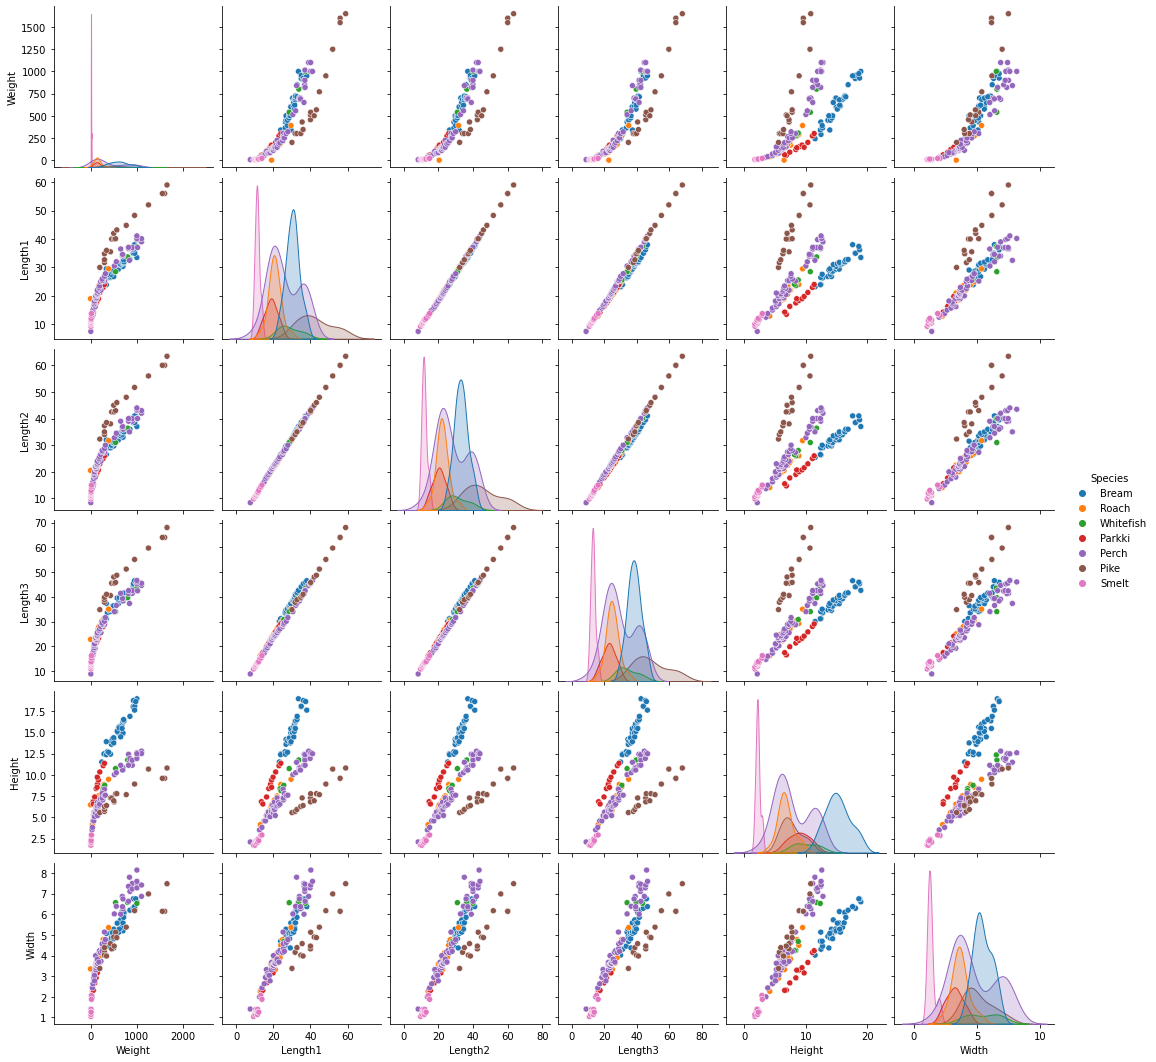

In [13]:
# a. (0,625) Vários gráficos de dispersão (em uma mesma figura) combinando cada par de característica (*feature*) dos peixes, e atribuindo uma cor diferente para cada espécie. 

sns.pairplot(df_fish, hue='Species')

<AxesSubplot:xlabel='Weight', ylabel='Count'>

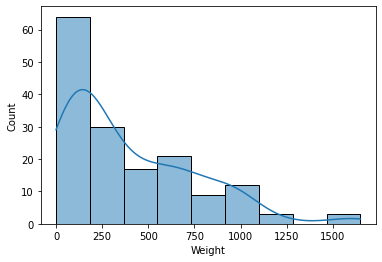

In [14]:
# b. (0,625) Crie um gráfico de distribuição da largura dos peixes (`Width`). Não deixe de incluir o KDE.

sns.histplot(data = df_fish, x = 'Weight', kde = True)

<AxesSubplot:>

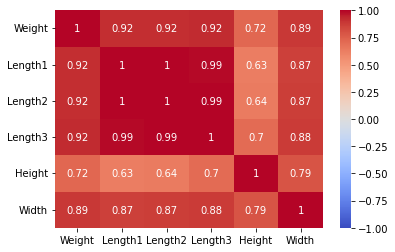

In [15]:
# c. (0,625) Crie um mapa de calor que apresente a correlação entre cada *feature* do peixe. Anote os dados no gráfico e utilize o `cmap=coolwarm`.
 
sns.heatmap(df_fish.corr(), cmap='coolwarm', vmin=-1, vmax=1, annot=True) 

## Questão 4

Utilizando o dataset de crimes em São Francisco (`crimes.csv`), mostre 4 gráficos que indicam as localidades dos crimes (dispersão). Crie os 4 gráficos em uma mesma figura e axes diferentes, de tal forma que exista 1 gráfico para cada período do dia (manhã, tarde, noite e madrugada). Além disso, mostre para cada categoria do crime uma cor diferente. Realize os processamentos necessários para criação dos gráficos.

> **Valendo 2,5 pontos.**

In [16]:
df_crimes = pd.read_csv('crimes.csv', sep = '|')
df_crimes.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId,periodo,resolucao
0,160002869,ASSAULT,BATTERY,Friday,01/01/2016 12:00:00 AM,21:35,NORTHERN,NONE,1700 Block of BUSH ST,-122.426077,37.788019,"(37.788018555829, -122.426077177375)",16000286904134,noite,outro
1,160086863,LARCENY/THEFT,ATTEMPTED THEFT FROM LOCKED VEHICLE,Friday,01/29/2016 12:00:00 AM,22:30,TARAVAL,NONE,1200 Block of 19TH AV,-122.477377,37.764478,"(37.7644781578695, -122.477376524003)",16008686306240,noite,outro
2,140776777,ASSAULT,AGGRAVATED ASSAULT WITH A GUN,Thursday,09/15/2016 12:00:00 AM,07:40,INGLESIDE,"ARREST, BOOKED",SILVER AV / CAMELLIA AV,-122.432326,37.729271,"(37.7292705199592, -122.432325871028)",14077677704011,manha,preso
3,160004558,ASSAULT,BATTERY WITH SERIOUS INJURIES,Saturday,01/02/2016 12:00:00 AM,16:40,MISSION,NONE,VALENCIA ST / 26TH ST,-122.420355,37.748906,"(37.7489063051829, -122.420354780861)",16000455804136,tarde,outro
4,160004655,ASSAULT,BATTERY,Saturday,01/02/2016 12:00:00 AM,17:05,INGLESIDE,NONE,900 Block of GENEVA AV,-122.439910,37.715765,"(37.715765426995, -122.439909766772)",16000465504134,tarde,outro


In [30]:
#Criando um dataframe para cada período
df_crimes_manha = df_crimes[df_crimes['periodo'] == 'manha']
df_crimes_tarde = df_crimes[df_crimes['periodo'] == 'tarde']
df_crimes_noite = df_crimes[df_crimes['periodo'] == 'noite']
df_crimes_madrugada = df_crimes[df_crimes['periodo'] == 'madrugada']

#Ordenando os datasets para que a cor de cada categoria seja a mesma
df_crimes_manha = df_crimes_manha.sort_values(['Category'])
df_crimes_tarde = df_crimes_tarde.sort_values(['Category'])
df_crimes_noite = df_crimes_noite.sort_values(['Category'])
df_crimes_madrugada = df_crimes_madrugada.sort_values(['Category'])


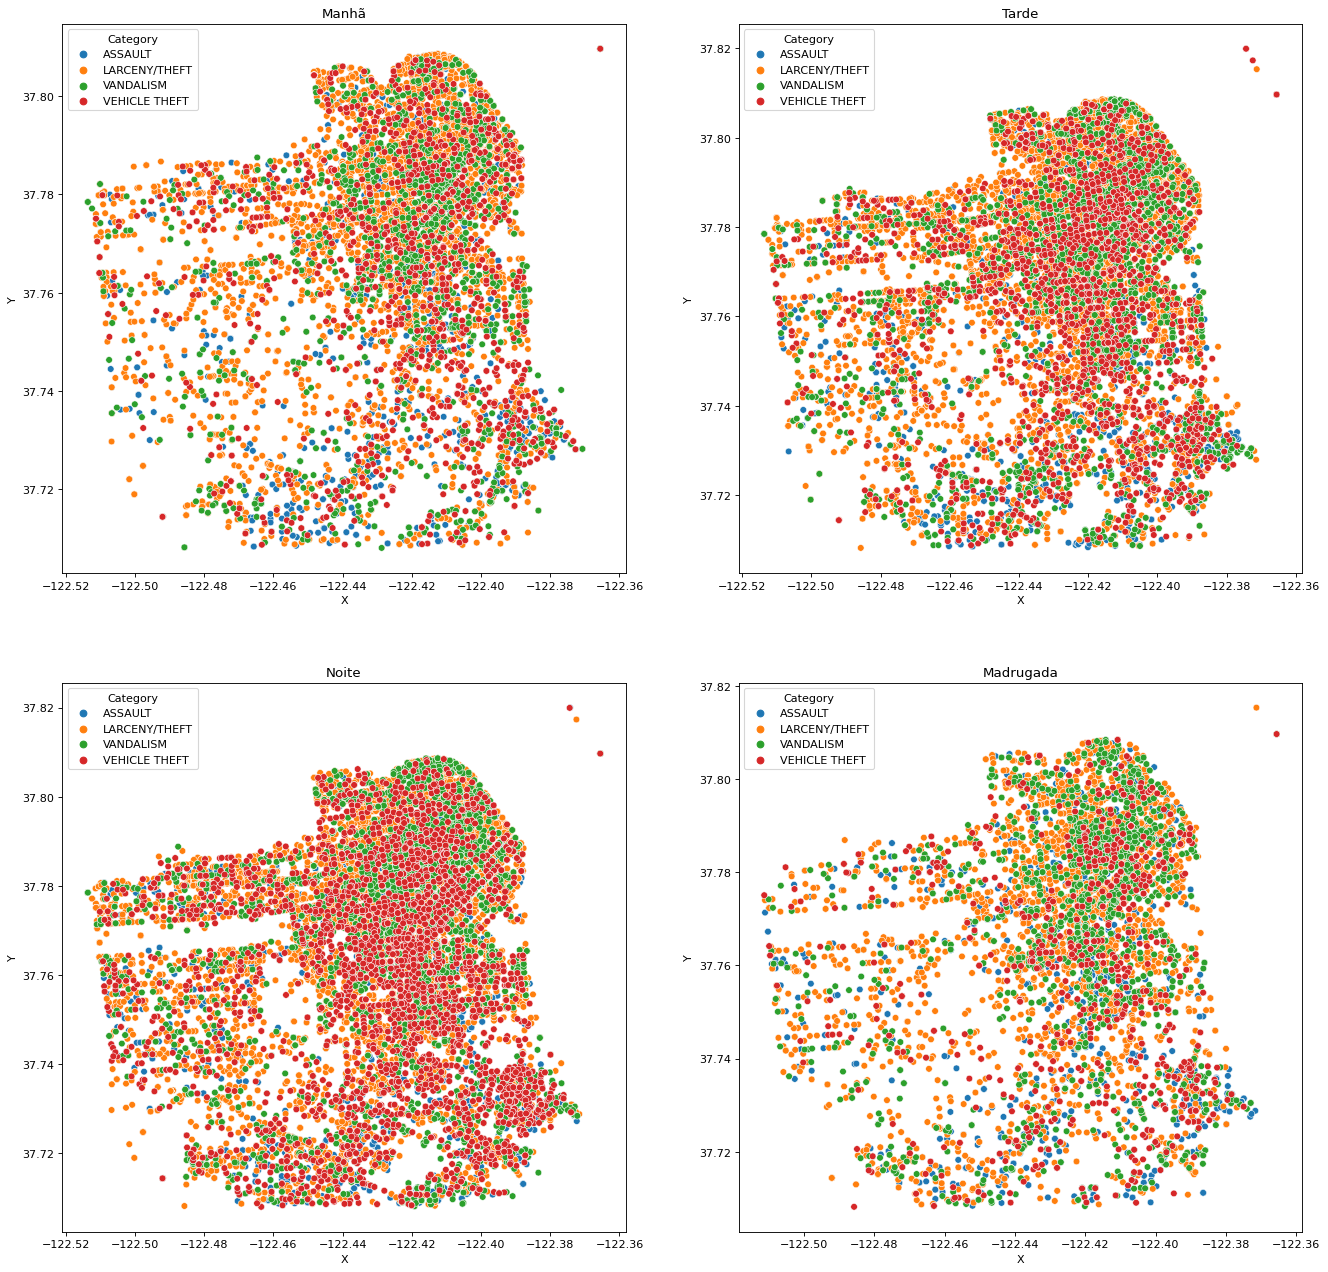

In [34]:
plt.figure(figsize=(20, 20), dpi=80)

plt.subplot(2, 2, 1)
sns.scatterplot(x = df_crimes_manha['X'], y = df_crimes_manha['Y'], hue = df_crimes_manha['Category'])
plt.title('Manhã')

plt.subplot(2, 2, 2)
sns.scatterplot(x = df_crimes_tarde['X'], y = df_crimes_tarde['Y'], hue = df_crimes_tarde['Category'])
plt.title('Tarde')

plt.subplot(2, 2, 3)
sns.scatterplot(x = df_crimes_noite['X'], y = df_crimes_noite['Y'], hue = df_crimes_noite['Category'])
plt.title('Noite')

plt.subplot(2, 2, 4)
sns.scatterplot(x = df_crimes_madrugada['X'], y = df_crimes_madrugada['Y'], hue = df_crimes_madrugada['Category'])
plt.title('Madrugada')

plt.show()